How to parse the dates at the time of loading data  
<code> df = pandas.read_csv('data.csv', parse_dates=['date'])</code>

Filter the data based on the date  
* <code>df = df[[d.month == 1 for d in df.date]].copy()</code>  
fetch only the january month data  
* <code>df = df[[d.month < 7 for d in df.date]].copy()</code>  
fetch only the 1 to 6 months data

club the yearly data into a fraction of day of year from a specific date  
<code>df["years_since_1990"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1990 for d in df.date]</code>

<b>Normalize</b> scale and offset the data column  
<code>df["normalised_temperature"] = (df["min_temperature"] - np.mean(df["min_temperature"])) / np.std(df["min_temperature"])</code>

To show the march $1^{st}$ of 1990  
<code>from datetime import datetime  
print(datetime(1990,3,1)) # yyyy,mm,dd</code>

Filter data based on list of dates  
<code>desired_dates = [  
    datetime(1950,2,1),  
    datetime(1960,2,1),  
    datetime(1970,2,1),  
    datetime(1980,2,1),  
]  
  
df = df[df.date.isin(desired_dates)].copy()</code>

Find the missing data

[titanic data](https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv)

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col=False, sep=",", header=0)
missing_data = df.isnull().sum().to_frame()  
missing_data = missing_data.rename(columns={0:'Empty Cells'})  
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


In [2]:
# info of about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here numerical types are  
int64, float64  
categorical types are  
object

<AxesSubplot:>

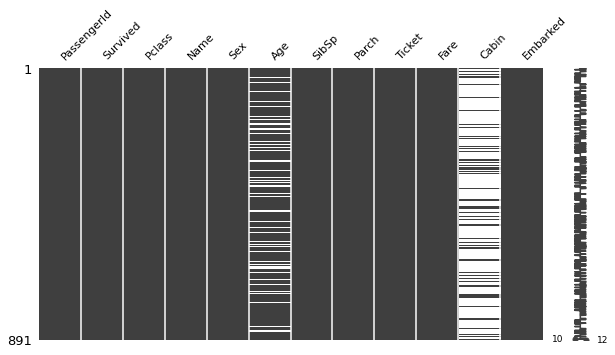

In [3]:
import missingno as msno
msno.matrix(df, figsize=(10,5), fontsize=11)

In [4]:
# combine two or more filter conditions

missing_age = df["Age"].isnull()
missing_cabin = df["Cabin"].isnull()
unknown_age_and_cabin = df[missing_age & missing_cabin].copy()

In [2]:
# drop columns from data, axis=1
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)

#### Option 1  
drop the missing data

In [5]:
# remove the records which are having Embarked column as null values
clean_dataset = df.dropna(subset=["Embarked"]).copy()
clean_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Option 2  
impute the missing data with mean


In [6]:
# calculate the mean of numerical data only for those where the Age>0
# cause there may be the null values which are recorded as the 0
# these 0 valued records will effect the mean of the data

mean_age = clean_dataset[clean_dataset.Age>0]['Age'].mean()
clean_dataset["Age"] = clean_dataset["Age"].fillna(mean_age).replace({0:mean_age})

#### Option 3  
Assign a new category to unknown categorical data

In [7]:
# Assign unknow to records where "Cabin" is empty
clean_dataset["Cabin"] = clean_dataset["Cabin"].fillna("Unknown")

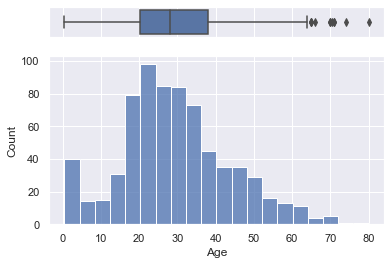

In [3]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset("iris")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=df["Age"], ax=ax_box)
sns.histplot(data=df,x="Age", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [4]:
import plotly.express as px
fig = px.histogram(df, x="Age", y="Survived", histfunc='avg', marginal = 'box')
fig.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

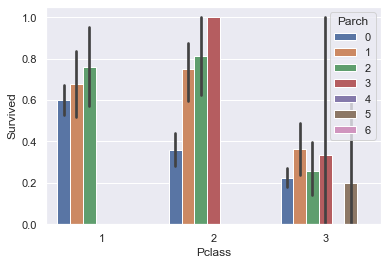

In [10]:
sns.barplot(data=clean_dataset,x="Pclass",y='Survived',hue="Parch")

In [5]:
fig = px.histogram(df, x="Pclass", y="Survived", histfunc='avg',color="Parch")
fig.update_layout(barmode='group')
fig.show()

<AxesSubplot:xlabel='Pclass', ylabel='SibSp'>

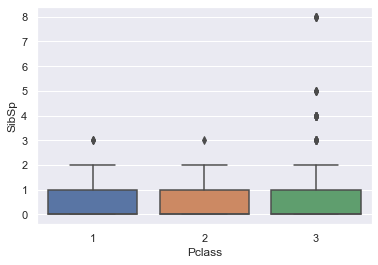

In [12]:
sns.boxplot(data=clean_dataset,x="Pclass",y="SibSp")

In [13]:
fig = px.box(data_frame=clean_dataset,x="Pclass",y="SibSp")
fig.show()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

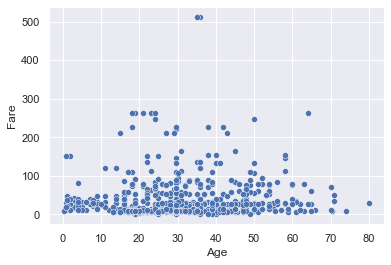

In [14]:
sns.scatterplot(data=clean_dataset,x="Age",y="Fare")

In [15]:
fig = px.scatter(data_frame=clean_dataset,x="Age",y="Fare")
fig.show()

In [16]:
clean_dataset['total']=1
fig = px.sunburst(clean_dataset, path=['Pclass','Sex','Survived','Embarked'], values='total')
fig.show()

In [17]:
import numpy as np
table = df.groupby(['Embarked','Sex'])['Survived'].agg([np.mean,'count']).reset_index().copy()
table.columns = table.columns.map({'Embarked':'Port','Sex':'Sex','mean':'Survival_rate','count':'Passenger_count'})
# table
fig = px.scatter(data_frame=table,x='Sex',y='Port',size='Passenger_count',size_max=80,color='Survival_rate')
fig.show()

## Feature engineering  
### one-hot encoding or dummy variables  
Find out which categorical variables will add value to model  
We can find these cat-columns by a simple procedure  
* get all the numerical variables in dataset and find log-loss w.r.t o/p  
* now try adding one of the cat-column in one-hot form and find log-loss  
* if the log-loss decreases then that cat-column adds value to model  
* if not then it is not adding value to o/p

In [6]:
df = df.dropna(subset=["Age"]).copy()

In [11]:
# calculating the logistic regression loss
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
features = ["Age", "Pclass", "SibSp", "Parch", "Fare"] 
X = df[features]
y = df.Survived
model = LogisticRegression(random_state=0, max_iter=2000).fit(X, y)
# calculate loss
probabilities = model.predict_proba(df[features])
loss = metrics.log_loss(df.Survived, probabilities)
loss

0.5708751873549369

In [7]:
# creating function for loss calculation
import pandas as pd
from typing import List
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
def titanic_log_loss(all_data:pd.DataFrame,features:List[str]):
    # splitting data into train an test datasets
    train, test = model_selection.train_test_split(all_data,test_size=0.3, random_state=0)
    X = train[features]
    y = train.Survived
    model =  LogisticRegression(random_state=0, max_iter=2000).fit(X, y)
    # calculate loss
    probabilities = model.predict_proba(test[features])
    loss = metrics.log_loss(test.Survived, probabilities)
    return loss

In [8]:
# only numerical data loss
features = ["Age", "Pclass", "SibSp", "Parch", "Fare"] 
titanic_log_loss(df,features)

0.5983936612258052

numerical log-loss

In [9]:
# adding cat-variable Sex as binary
df['IsFemale'] = df['Sex'].replace({'male':0,'female':1})
features = ["Age", "Pclass", "SibSp", "Parch", "Fare", 'IsFemale']
titanic_log_loss(df,features)

0.44813325444268254

$\implies$ It reduced the log loss then this variable is important

In [10]:
# converting cat-variable Pclass into one-hot
print(df['Pclass'].unique())
pclass_one_hot = pd.get_dummies(df, columns=['Pclass'],drop_first=False).copy()
pclass_one_hot['Pclass'] = df.Pclass
print(pclass_one_hot.columns)

features = ["Age", "SibSp", "Parch", "Fare", 'IsFemale', 'Pclass_1', 'Pclass_2', 'Pclass_3']
titanic_log_loss(pclass_one_hot,features)

[3 1 2]
Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'IsFemale', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Pclass'],
      dtype='object')


0.44887192799227477

$\implies$ It slightly worsen the model

In [51]:
print(f"distinct cabins: {len(df['Cabin'].unique())}")
df['Cabin'].unique()

distinct cabins: 135


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'D33', 'B30', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'D47', 'B86',
       'F2', 'C2', 'B19', 'A7', 'C49', 'F4', 'B4', 'B80', 'A31', 'D36',
       'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'B49', 'D', 'C22 C26', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'E33', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52',
       'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'E12', 'E63', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90', 'C126', 'C45', 'E8', 'B101', 'C46', 'D30', 'E121', 'D11',
       'E

In [52]:
Cabin_one_hot = pd.get_dummies(df,columns=['Pclass','Cabin'],drop_first=False).copy()
Cabin_one_hot.columns.map(lambda x:x if x)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,IsFemale,Pclass_1,Pclass_2,...,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T
0,0,male,22.0,1,0,7.2500,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,female,38.0,1,0,71.2833,C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,S,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,female,35.0,1,0,53.1000,S,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,male,35.0,0,0,8.0500,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
